# Analyzing Movie Reviews

Is there a significant difference among popular movie review sites?

In [7]:
import pandas as pd
import numpy as np

movies = pd.read_csv("fandango_score_comparison.csv")

movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


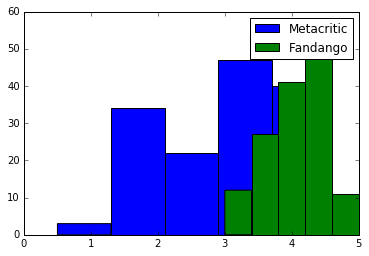

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Metacritic_norm_round"],bins=5,label="Metacritic")
plt.xlim(0,5)

plt.hist(movies["Fandango_Stars"],bins=5,label="Fandango")
plt.xlim(0,5)

plt.legend()


It seems like Metacritic reviews have a larger variance but Fandango reviews are skewed positively.

In [8]:
print("Mean of Fandango Stars:",movies["Fandango_Stars"].mean())
print("Mean of Normalized Metacritic Rates", movies["Metacritic_norm_round"].mean())

print("Median of Fandango Stars:",movies["Fandango_Stars"].median())
print("Median of Normalized Metacritic Rates", movies["Metacritic_norm_round"].median())

print("Std.Dev of Fandango Stars:",np.std(movies["Fandango_Stars"]))
print("Std.Dev of Normalized Metacritic Rates", np.std(movies["Metacritic_norm_round"]))



Mean of Fandango Stars: 4.08904109589
Mean of Normalized Metacritic Rates 2.97260273973
Median of Fandango Stars: 4.0
Median of Normalized Metacritic Rates 3.0
Std.Dev of Fandango Stars: 0.53853216127
Std.Dev of Normalized Metacritic Rates 0.987561029704


## Fandango vs Metacritic Methodology

Details of Metacritics policy is transparent and can be found on their web site http://www.metacritic.com/about-metascores . However it is not the case for Fandango. There is no information on site. 

## Fandango vs Metacritic number differences

-  Mean of Fandango stars is lower than the median. This tells us that some few high ratings that drags up the mean. 
-  For metacritic situation is absolutly opposite. Mean is higher than median. 
-  As Fandango commetcially benefits from higher rated movies, about metrics may imply some suspicious activity

We can see how ratings compare by visually inspecting them with a scatter plot

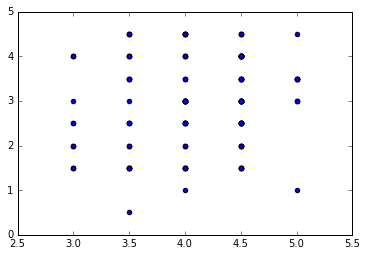

In [15]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

Check movies that has the highest difference in ratings

In [17]:
movies["fm_diff"] = np.abs(movies["Fandango_Stars"]-movies["Metacritic_norm_round"])
movies.sort_values(by="fm_diff",ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [18]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

r_value

0.17844919073895918

## Fandango and Metacritic correlation

There is a very low correlation between two sites. 

In [20]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [21]:
pred = 3 * slope + intercept

pred

4.0917071528212041

If a movie got 3.0 from Metacritic, it would get 4.09 from Fandango

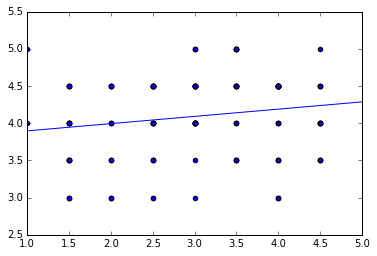

In [22]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()